In [17]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

need to remember that the pixel to cm conversion factor which change depending on resolution of video

In [2]:
# tracking data is not great yet so will focus on body node 
# calculate the average distance for one tracking file first 
# want a dictionary which holds the average distance between every combination of tracks per unique frame

df = pd.read_csv('/Volumes/lab-windingm/home/users/cochral/AttractionRig/Videos/N Free Roaming Larvae/SLEAP-CSV/agarose-day4-n10/v025.2023-10-23_day4_n=10_A3.analysis.csv')


average_distance_dict = {}  # empty dictionary


for frame in df['frame_idx'].unique():
    
    unique_frame = df[df['frame_idx'] == frame] # filter to ensure the frame is unique 
    
    # cdist function requires two 2-dimensional array-like objects as inputs
    # create an array of the coordinates for that specific frame

    body_coordinates = unique_frame[['body.x', 'body.y']].to_numpy()

    # The cdist function computes the distance between every pair of points in the two arrays passed to it.

    distance = cdist(body_coordinates, body_coordinates, 'euclidean')

    # the cdist function will also calculate the distance between the same tracks e.g. track 1 to track 1 
    # there will be 0s which should be exluded 
    # dont want to just ignore the 0s incase an animal is on top of one another 
    # the cdist function calculates the distances between tracks in a matrix fashion 
    # so can ignore the diagonal values which would refer distance between identical tracks 

    np.fill_diagonal(distance, np.nan)

    average_distance = np.nanmean(distance)

    pixel_to_cm =  9/1040 # conversion factor 

    average_distance = average_distance * pixel_to_cm 

    # store average distance value in dictionary with the frame as the key  

    average_distance_dict[frame] = average_distance  



# Creating a DataFrame
df_average_distances = pd.DataFrame({
    'frame_idx': average_distance_dict.keys(),
    'average_distance': average_distance_dict.values()})

df_average_distances


# its in pixels rn whoops 
# 1040 pixels for diameter of petri dish in 1400 1400 resolution?


,frame_idx,average_distance
0,0,1.682233
1,1,1.661325
2,2,2.494204
3,3,2.540942
4,4,2.610135
...,...,...
594,594,5.547547
595,595,5.559030
596,596,5.568897
597,597,5.571250


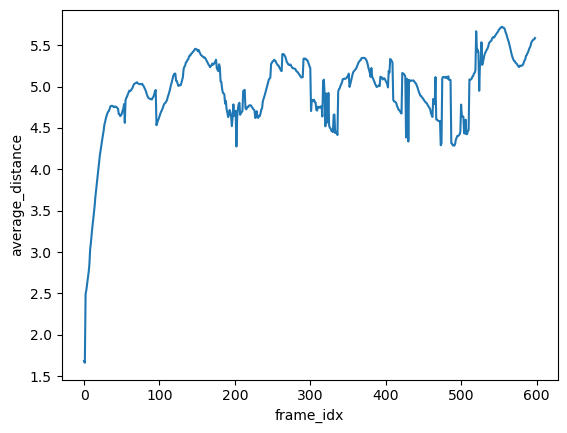

In [3]:
sns.lineplot(data=df_average_distances, x='frame_idx', y='average_distance')

plt.show()

In [4]:
# now want to iterate over every csv file and find the average distance per frame for each csv file 
# this is easy to do i think 
# can i sort the columns in ascending order ?- frames for example 

average_distances_1 = []
frame_id_1 = []

directory_path1 = '/Volumes/lab-windingm/home/users/cochral/AttractionRig/Videos/N Free Roaming Larvae/SLEAP-CSV/agarose-day4-n10'

# have to use such to iterate over all the files
for file in os.listdir(directory_path1):

    if file.endswith('csv'): # only csv files

        file_path = os.path.join(directory_path1, file)

        df = pd.read_csv(file_path)

        for frame in df['frame_idx'].unique():
            
            unique_frame = df[df['frame_idx'] == frame] # filter to ensure the frame is unique 
    
            # cdist function requires two 2-dimensional array-like objects as inputs
            # create an array of the coordinates for that specific frame

            body_coordinates = unique_frame[['body.x', 'body.y']].to_numpy()

            # The cdist function computes the distance between every pair of points in the two arrays passed to it.

            distance = cdist(body_coordinates, body_coordinates, 'euclidean')

            # the cdist function will also calculate the distance between the same tracks e.g. track 1 to track 1 
            # there will be 0s which should be exluded 
            # dont want to just ignore the 0s incase an animal is on top of one another 
            # the cdist function calculates the distances between tracks in a matrix fashion 
            # so can ignore the diagonal values which would refer distance between identical tracks 

            np.fill_diagonal(distance, np.nan)

            average_distance = np.nanmean(distance)

            pixel_to_cm =  9/1040 # conversion factor 

            average_distance = average_distance * pixel_to_cm 

            # store frame id and average distance values in two lists 
            # if used a dictionary as before appending the same frame from a new file overides the previous value

            frame_id_1.append(frame) 
            average_distances_1.append(average_distance)


        else:
            continue 


df_average_distances_1 = pd.DataFrame({
    'frame': frame_id_1,
    'average_distance': average_distances_1})


# sort the frame column in ascending values 
df_average_distances_1 = df_average_distances_1.sort_values(by='frame', ascending=True)

df_average_distances_1

,frame,average_distance
0,0,0.651396
3588,0,2.713973
2992,0,0.950980
2393,0,1.682233
599,0,2.065072
...,...,...
1793,598,4.435968
2991,598,5.587447
5381,598,5.441275
4782,598,5.080127


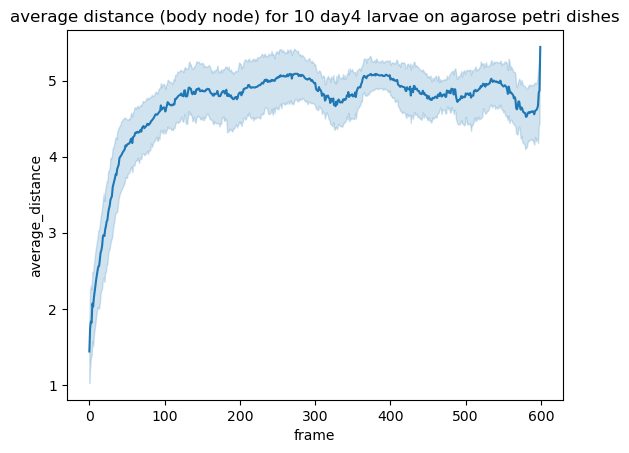

In [5]:
# this is for all the agarose files 

sns.lineplot(data=df_average_distances_1, x='frame', y='average_distance')

plt.title('average distance (body node) for 10 day4 larvae on agarose petri dishes')

plt.show()

In [6]:
# keep condition of folder 
#for folder in directory(''):

average_distances = []
frame_id = []
condition = []


directory_path = '/Volumes/lab-windingm/home/users/cochral/AttractionRig/Videos/N Free Roaming Larvae/SLEAP-CSV'


for condition_folder in os.listdir(directory_path):

    path = os.path.join(directory_path, condition_folder)

    # Check if the folder is indeed a directory
    if os.path.join(path):
        
        # iterate over all the files in the folder
        for file in os.listdir(path):

            if file.endswith('csv'): # only csv files
                
                
                file_path = os.path.join(path, file)
                
                
                df = pd.read_csv(file_path)

                for frame in df['frame_idx'].unique():
            
                    unique_frame = df[df['frame_idx'] == frame] # filter to ensure the frame is unique 
    
                    # cdist function requires two 2-dimensional array-like objects as inputs
                    # create an array of the coordinates for that specific frame

                    body_coordinates = unique_frame[['body.x', 'body.y']].to_numpy()

                    # The cdist function computes the distance between every pair of points in the two arrays passed to it.

                    distance = cdist(body_coordinates, body_coordinates, 'euclidean')


                    # the cdist function will also calculate the distance between the same tracks e.g. track 1 to track 1 
                    # there will be 0s which should be exluded 
                    # dont want to just ignore the 0s incase an animal is on top of one another 
                    # the cdist function calculates the distances between tracks in a matrix fashion 
                    # so can ignore the diagonal values which would refer distance between identical tracks 

                    np.fill_diagonal(distance, np.nan)

                    average_distance = np.nanmean(distance)

                    pixel_to_cm =  9/1040 # conversion factor 

                    average_distance = average_distance * pixel_to_cm 

                    # store frame id and average distance values in two lists 
                    # if used a dictionary as before appending the same frame from a new file overides the previous value

                    frame_id.append(frame) 
                    average_distances.append(average_distance)
                    condition.append(condition_folder)


            else:
                continue 


df_average_distances = pd.DataFrame({'condition': condition,
    'frame': frame_id,
    'average_distance': average_distances})


# sort the frame column in ascending values 
df_average_distances = df_average_distances.sort_values(by='frame', ascending=True)

df_average_distances



/var/folders/g_/qk19_b9s62l1w5lmx5_1gmzjx_y855/T/ipykernel_25302/1898480324.py:52: RuntimeWarning: Mean of empty slice
  average_distance = np.nanmean(distance)
/var/folders/g_/qk19_b9s62l1w5lmx5_1gmzjx_y855/T/ipykernel_25302/1898480324.py:52: RuntimeWarning: Mean of empty slice
  average_distance = np.nanmean(distance)
/var/folders/g_/qk19_b9s62l1w5lmx5_1gmzjx_y855/T/ipykernel_25302/1898480324.py:52: RuntimeWarning: Mean of empty slice
  average_distance = np.nanmean(distance)
/var/folders/g_/qk19_b9s62l1w5lmx5_1gmzjx_y855/T/ipykernel_25302/1898480324.py:52: RuntimeWarning: Mean of empty slice
  average_distance = np.nanmean(distance)
/var/folders/g_/qk19_b9s62l1w5lmx5_1gmzjx_y855/T/ipykernel_25302/1898480324.py:52: RuntimeWarning: Mean of empty slice
  average_distance = np.nanmean(distance)
/var/folders/g_/qk19_b9s62l1w5lmx5_1gmzjx_y855/T/ipykernel_25302/1898480324.py:52: RuntimeWarning: Mean of empty slice
  average_distance = np.nanmean(distance)
/var/folders/g_/qk19_b9s62l1w5lmx5

,condition,frame,average_distance
0,agarose-day3-n10,0,0.437794
20459,agarose-day4-n10,0,0.950980
17467,agarose-day4-n10,0,0.651396
14474,agarose-day4-n2,0,0.302982
9663,food-day3-n2,0,0.170040
...,...,...,...
6034,food-day4-n2,1209,6.106069
2405,food-day4-n2,1209,5.189280
10872,food-day3-n2,1209,NaN
4824,food-day4-n2,1209,2.410516


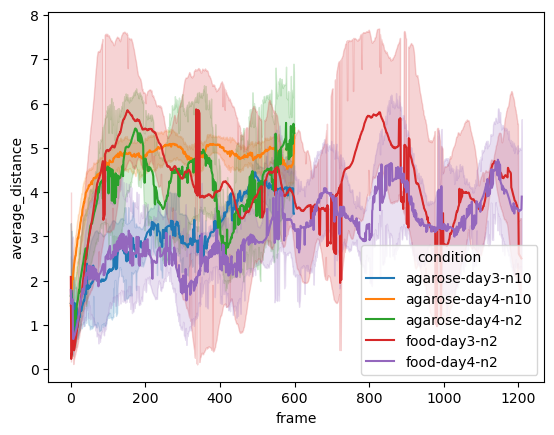

In [7]:
sns.lineplot(data=df_average_distances, x='frame', y='average_distance', hue='condition')


plt.show()

/Users/cochral/miniconda3/envs/maggots/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


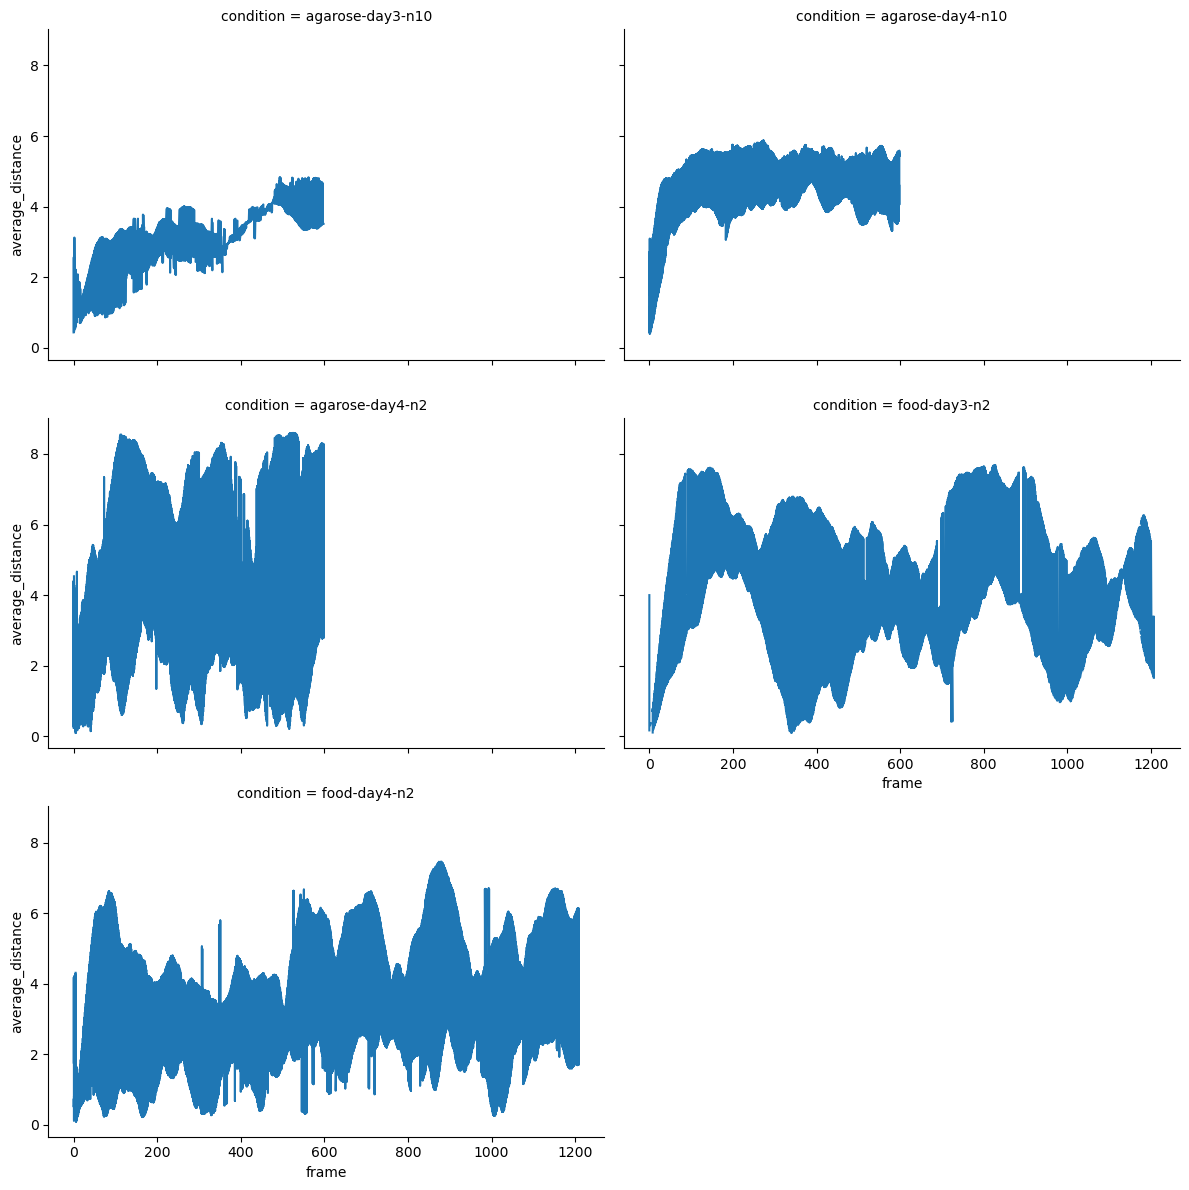

In [8]:
g = sns.FacetGrid(df_average_distances, col='condition', col_wrap=2, height=4, aspect=1.5)
g = g.map(plt.plot, 'frame', 'average_distance')

plt.show()

In [18]:
# keep condition of folder 
#for folder in directory(''):

# frame rate issues 

# account for different framerates 
frame_rates = {'agarose-day4-n2': 1, 'agarose-day4-n10': 1, 'agarose-day3-n2': 1, 'agarose-day3-n10': 1, 'food-day3-n2': 2, 'food-day3-n10': 2, 'food-day4-n2': 2, 'food-day3-n10': 2}
pixel_to_cm_rates = {'agarose-day4-n2': (9/1040), 'agarose-day4-n10': (9/1040), 'agarose-day3-n2': (9/1040), 'agarose-day3-n10': (9/1040), 'food-day3-n2': (9/950), 'food-day3-n10': (9/950), 'food-day4-n2': (9/950), 'food-day4-n10': (9/950)}


average_distances = []
time = []
condition = []


directory_path = '/Volumes/lab-windingm/home/users/cochral/AttractionRig/Videos/N Free Roaming Larvae/SLEAP-CSV'


for condition_folder in os.listdir(directory_path):

    path = os.path.join(directory_path, condition_folder)

    # Check if the folder is indeed a directory
    if os.path.join(path):
        
        # iterate over all the files in the folder
        for file in os.listdir(path):

            if file.endswith('csv'): # only csv files
                
                
                file_path = os.path.join(path, file)
                
                
                df = pd.read_csv(file_path)

                frame_rate = frame_rates[condition_folder]

                for frame in df['frame_idx'].unique():
            
                    unique_frame = df[df['frame_idx'] == frame] # filter to ensure the frame is unique 
    
                    # cdist function requires two 2-dimensional array-like objects as inputs
                    # create an array of the coordinates for that specific frame

                    body_coordinates = unique_frame[['body.x', 'body.y']].to_numpy()

                    # The cdist function computes the distance between every pair of points in the two arrays passed to it.

                    distance = cdist(body_coordinates, body_coordinates, 'euclidean')


                    # the cdist function will also calculate the distance between the same tracks e.g. track 1 to track 1 
                    # there will be 0s which should be exluded 
                    # dont want to just ignore the 0s incase an animal is on top of one another 
                    # the cdist function calculates the distances between tracks in a matrix fashion 
                    # so can ignore the diagonal values which would refer distance between identical tracks 

                    np.fill_diagonal(distance, np.nan)

                    average_distance = np.nanmean(distance)

                    pixel_to_cm = pixel_to_cm_rates[condition_folder] # conversion factor depending on resolution

                    average_distance = average_distance * pixel_to_cm 

                    frame_to_time = frame / frame_rate

                    # store frame id and average distance values in two lists 
                    # if used a dictionary as before appending the same frame from a new file overides the previous value

                    time.append(frame_to_time) 
                    average_distances.append(average_distance)
                    condition.append(condition_folder)


            else:
                continue 


df_average_distances = pd.DataFrame({'condition': condition,
    'time': time,
    'average_distance': average_distances})


# sort the frame column in ascending values 
df_average_distances = df_average_distances.sort_values(by='time', ascending=True)

df_average_distances



/var/folders/g_/qk19_b9s62l1w5lmx5_1gmzjx_y855/T/ipykernel_25302/2565737471.py:61: RuntimeWarning: Mean of empty slice
  average_distance = np.nanmean(distance)
/var/folders/g_/qk19_b9s62l1w5lmx5_1gmzjx_y855/T/ipykernel_25302/2565737471.py:61: RuntimeWarning: Mean of empty slice
  average_distance = np.nanmean(distance)
/var/folders/g_/qk19_b9s62l1w5lmx5_1gmzjx_y855/T/ipykernel_25302/2565737471.py:61: RuntimeWarning: Mean of empty slice
  average_distance = np.nanmean(distance)
/var/folders/g_/qk19_b9s62l1w5lmx5_1gmzjx_y855/T/ipykernel_25302/2565737471.py:61: RuntimeWarning: Mean of empty slice
  average_distance = np.nanmean(distance)
/var/folders/g_/qk19_b9s62l1w5lmx5_1gmzjx_y855/T/ipykernel_25302/2565737471.py:61: RuntimeWarning: Mean of empty slice
  average_distance = np.nanmean(distance)
/var/folders/g_/qk19_b9s62l1w5lmx5_1gmzjx_y855/T/ipykernel_25302/2565737471.py:61: RuntimeWarning: Mean of empty slice
  average_distance = np.nanmean(distance)
/var/folders/g_/qk19_b9s62l1w5lmx5

,condition,time,average_distance
0,agarose-day3-n10,0.0,0.437794
21651,agarose-day4-n10,0.0,1.157719
1196,food-day4-n2,0.0,0.784371
21055,agarose-day4-n10,0.0,2.713973
20459,agarose-day4-n10,0.0,0.950980
...,...,...,...
6034,food-day4-n2,604.5,6.684539
2405,food-day4-n2,604.5,5.680896
7244,food-day4-n2,604.5,2.068633
4824,food-day4-n2,604.5,2.638881


/Users/cochral/miniconda3/envs/maggots/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


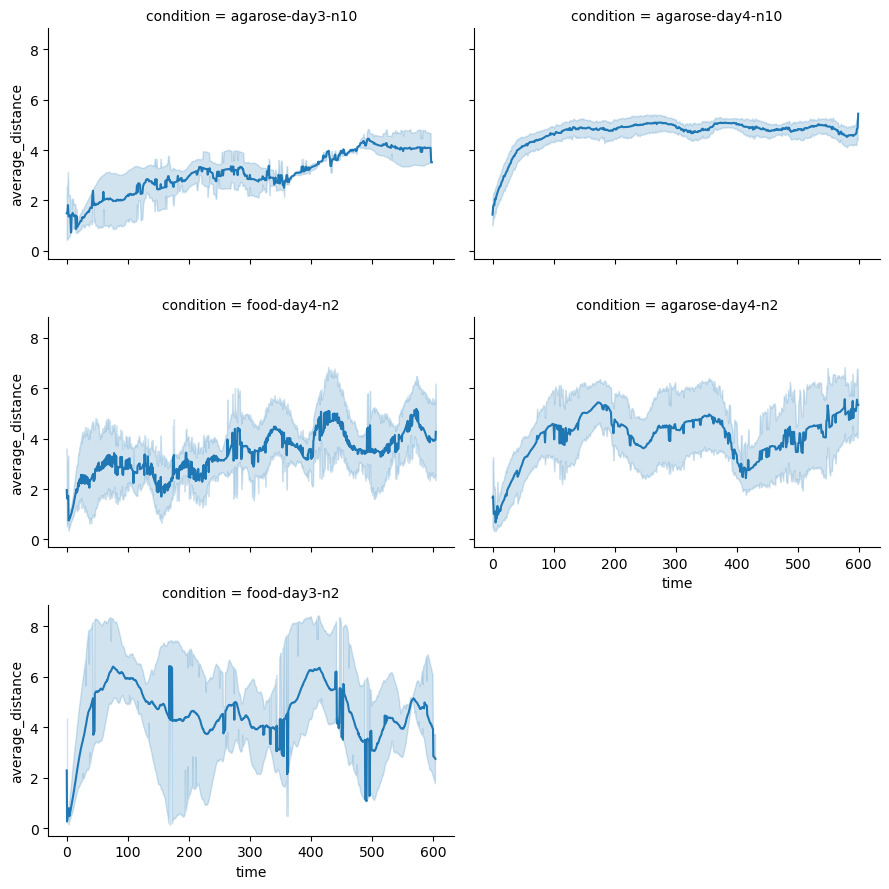

In [19]:
g = sns.FacetGrid(df_average_distances, col='condition', col_wrap=2, height=3, aspect=1.5)
g = g.map(sns.lineplot, 'time', 'average_distance')

plt.show()

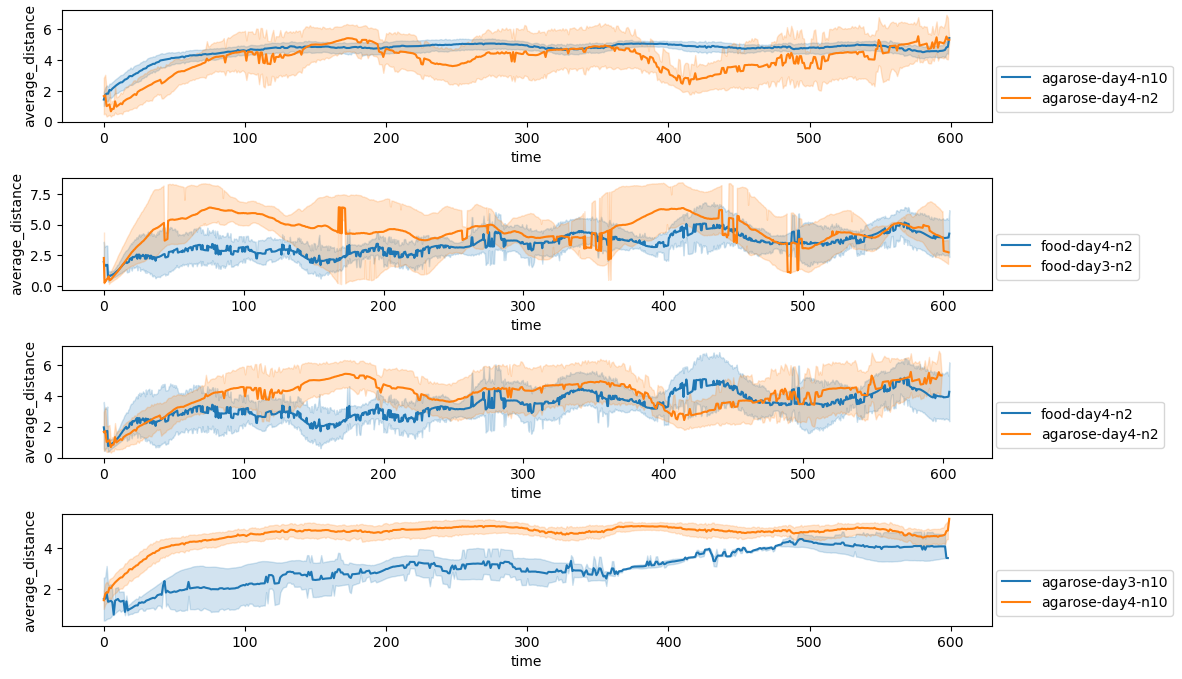

In [20]:


# Create a 2x2 grid of subplots
fig, axes = plt.subplots(4, 1, figsize=(12, 8))  # Adjust the size as necessary


# Subplot 1
sns.lineplot(data=df_average_distances[df_average_distances['condition'].isin(['agarose-day4-n2', 'agarose-day4-n10'])],
             x='time', y='average_distance', hue='condition', ax=axes[0])

ax = axes[0]

ax.legend(bbox_to_anchor=(1.005, 0.5), loc=2, borderaxespad=0.)


# Subplot 2
sns.lineplot(data=df_average_distances[df_average_distances['condition'].isin(['food-day3-n2', 'food-day4-n2'])],
             x='time', y='average_distance', hue='condition', ax=axes[1])

ax = axes[1]

ax.legend(bbox_to_anchor=(1.005, 0.5), loc=2, borderaxespad=0.)

# Subplot 3
sns.lineplot(data=df_average_distances[df_average_distances['condition'].isin(['food-day4-n2', 'agarose-day4-n2'])],
             x='time', y='average_distance', hue='condition', ax=axes[2])

ax = axes[2]

ax.legend(bbox_to_anchor=(1.005, 0.5), loc=2, borderaxespad=0.)

sns.lineplot(data=df_average_distances[df_average_distances['condition'].isin(['agarose-day4-n10', 'agarose-day3-n10'])],
             x='time', y='average_distance', hue='condition', ax=axes[3])

ax = axes[3]

ax.legend(bbox_to_anchor=(1.005, 0.5), loc=2, borderaxespad=0.)



fig.subplots_adjust(hspace=0.5)

plt.show()

